In [1]:
import numpy as np
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

sns.set(style = 'dark')
%matplotlib inline
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

In [2]:
fifa_16 = pd.read_csv("cleaned_fifa_16.csv")
fifa_17 = pd.read_csv("cleaned_fifa_17.csv")
fifa_18 = pd.read_csv("cleaned_fifa_18.csv")
fifa_19 = pd.read_csv("cleaned_fifa_19.csv")
fifa_15 = pd.read_csv("cleaned_fifa_20.csv")

In [3]:
fifa_16.head(3)

,Unnamed: 0,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right
0,0,158023,L. Messi,28,170,72,Argentina,FC Barcelona,94,111.0,550.0,Left,Yes,RM,10.0,92.0,88.0,86.0,95.0,24.0,62.0,71,90,96,95,90,1,0
1,1,20801,Cristiano Ronaldo,30,185,80,Portugal,Real Madrid,93,85.5,475.0,Right,Yes,LM,7.0,92.0,93.0,80.0,91.0,33.0,78.0,86,77,91,91,93,1,1
2,2,9014,A. Robben,31,180,80,Netherlands,FC Bayern München,90,56.0,250.0,Left,Yes,RM,10.0,92.0,86.0,82.0,92.0,32.0,64.0,51,83,90,92,92,1,0


In [4]:
fifa_17.head(2)

,Unnamed: 0,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right
0,0,20801,Cristiano Ronaldo,31,185,80,Portugal,Real Madrid,94,87.0,340.0,Right,Yes,LM,7.0,92.0,92.0,81.0,91.0,33.0,80.0,87,77,92,91,92,1,1
1,1,158023,L. Messi,29,170,72,Argentina,FC Barcelona,93,89.0,340.0,Left,Yes,RM,10.0,89.0,90.0,86.0,96.0,26.0,61.0,71,90,95,92,87,1,0


In [5]:
fifa_18.head(2)

,Unnamed: 0,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right
0,0,20801,Cristiano Ronaldo,32,185,80,Portugal,Real Madrid,94,95.5,565.0,Right,Yes,LM,7.0,90.0,93.0,82.0,90.0,33.0,80.0,88,76,93,89,91,1,1
1,1,158023,L. Messi,30,170,72,Argentina,FC Barcelona,93,105.0,565.0,Left,Yes,RM,10.0,89.0,90.0,86.0,96.0,26.0,61.0,71,90,95,92,87,1,0


In [6]:
fifa_19.head(2)

,Unnamed: 0,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right
0,0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,77.0,405.0,Right,Yes,ST,7.0,90.0,93.0,81.0,89.0,35.0,79.0,89,76,94,89,91,1,1
1,1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,110.5,565.0,Left,Yes,ST,10.0,88.0,91.0,88.0,96.0,32.0,61.0,70,94,96,91,86,1,0


In [8]:
fifa_15.columns

Index(['Unnamed: 0', 'id', 'name', 'age', 'height', 'weight', 'nationality',
       'club', 'rating', 'value_M', 'wage_K', 'preferred_foot', 'real_face',
       'position', 'jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'heading', 'free_kick', 'ball_control',
       'acceleration', 'speed', 'real_face_Yes', 'preferred_foot_Right'],
      dtype='object')

In [9]:
fifa_15.describe()

,Unnamed: 0,id,age,height,weight,rating,value_M,wage_K,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18038.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,9138.500000,219738.864482,25.283291,181.362184,75.276343,66.244994,2.484038,9.456943,20.103892,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,52.221468,42.708885,58.461976,64.299923,64.415746,0.107670,0.763760
std,5276.548446,27960.200461,4.656964,6.756961,7.047744,6.949953,5.585481,21.351714,16.603639,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,17.428429,17.433612,16.741878,15.042232,14.847763,0.309972,0.424783
min,0.000000,768.000000,16.000000,156.000000,50.000000,48.000000,0.000000,0.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,5.000000,4.000000,5.000000,12.000000,11.000000,0.000000,0.000000
25%,4569.250000,204445.500000,22.000000,177.000000,70.000000,62.000000,0.325000,1.000000,9.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,44.000000,31.000000,54.000000,56.000000,57.000000,0.000000,1.000000
50%,9138.500000,226165.000000,25.000000,181.000000,75.000000,66.000000,0.700000,3.000000,17.000000,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,56.000000,41.000000,63.000000,67.000000,67.000000,0.000000,1.000000
75%,13707.750000,240795.750000,29.000000,186.000000,80.000000,71.000000,2.100000,8.000000,27.000000,75.000000,63.000000,64.000000,69.000000,65.000000,72.000000,64.000000,56.000000,69.000000,75.000000,75.000000,0.000000,1.000000
max,18277.000000,252905.000000,42.000000,205.000000,110.000000,94.000000,105.500000,565.000000,99.000000,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000,93.000000,94.000000,96.000000,97.000000,96.000000,1.000000,1.000000


In [10]:
#Radar plot:
Messi = {'Pace':89,'Shooting':90,'Passing':86,'Dribbling':95,'Defending':26,'Physical':61}
Ronaldo = {'Pace':90,'Shooting':93,'Passing':82,'Dribbling':90,'Defending':33,'Physical':80}

In [18]:
radar_15 = fifa_15[["name", "pace", "shooting", "passing", "dribbling", "defending", "physic"]]
radar_15 = radar_15.set_index(["name"])
radar_15 = radar_15.dropna()
radar_15.head(2)

,pace,shooting,passing,dribbling,defending,physic
name,,,,,,
L. Messi,87.0,92.0,92.0,96.0,39.0,66.0
Cristiano Ronaldo,90.0,93.0,82.0,89.0,35.0,78.0


In [19]:
radar_15.describe()

,pace,shooting,passing,dribbling,defending,physic
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678
std,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162
min,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000
25%,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000
50%,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000
75%,75.000000,63.000000,64.000000,69.000000,65.000000,72.000000
max,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000


In [20]:
# make a list out of the columns' names and call it Attributes
Attributes =list(radar_15)
AttNo = len(Attributes)

In [21]:
# Rondaldo's values
values = radar_15.iloc[1].tolist()
values += values [:1]
values

[90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 90.0]

In [22]:
# Radar plot angles:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

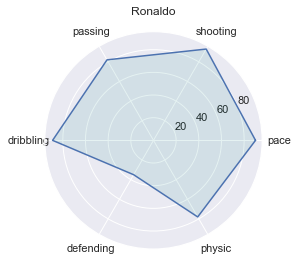

In [23]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title("Ronaldo")
plt.show()

In [24]:
#Find the values and angles for Messi
values2 = radar_15.iloc[0].tolist()
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

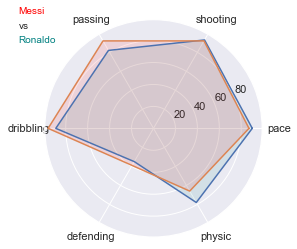

In [25]:
#Create the chart as before, but with both Ronaldo's and Messi's angles/values
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1],Attributes)

ax.plot(angles,values)
ax.fill(angles, values, 'teal', alpha=0.1)

ax.plot(angles2,values2)
ax.fill(angles2, values2, 'red', alpha=0.1)

#Rather than use a title, individual text points are added
plt.figtext(0.2,0.9,"Messi",color="red")
plt.figtext(0.2,0.85,"vs")
plt.figtext(0.2,0.8,"Ronaldo",color="teal")
plt.show()

In [26]:
# Creating a function to plot individual players
def createRadar(df, player):
    Attributes =list(radar_15)
    AttNo = len(Attributes)
    
    data = df.loc[player, :].tolist()
    data += data [:1]
    
    angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)
    ax.plot(angles,data)
    ax.fill(angles, data, 'blue', alpha=0.1)

    ax.set_title(player)
    plt.show()

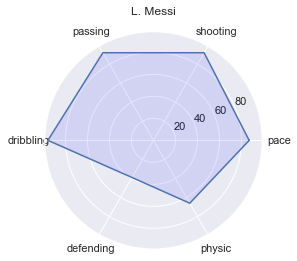

In [27]:
#Example:
createRadar(radar_15, "L. Messi")

In [28]:
# Function to compare two players
def createRadar2(df1, player1, df2, player2):
    Attributes =list(radar_15)
    AttNo = len(Attributes)
    
    data = df1.loc[player1, :].tolist()
    data += data [:1]
    
    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles += angles [:1]
    
    data2 = df2.loc[player2, :].tolist()
    data2 += data2 [:1]
    
    angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    #Create the chart as before, but with both Ronaldo's and Messi's angles/values
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,data)
    ax.fill(angles, data, 'teal', alpha=0.1)

    ax.plot(angles2,data2)
    ax.fill(angles2, data2, 'red', alpha=0.1)

    #Rather than use a title, individual text points are added
    plt.figtext(0.2,0.9,player1,color="teal")
    plt.figtext(0.2,0.85,"vs")
    plt.figtext(0.2,0.8,player2,color="red")
    plt.show()

C:\Users\Seno\Miniconda3\envs\code_red\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


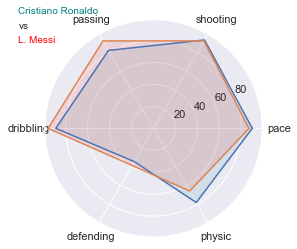

In [29]:
#example:
createRadar2(radar_15, "Cristiano Ronaldo", radar_15,"L. Messi");

In [33]:
scatter_16 = fifa_16[["value_M", "rating", "position"]]
scatter_16

,value_M,rating,position
0,111.00,94,RM
1,85.50,93,LM
2,56.00,90,RM
3,58.00,90,GK
4,69.00,90,ST
...,...,...,...
14876,0.06,44,CM
14877,0.05,44,CM
14878,0.04,44,GK
14879,0.03,44,LB


In [35]:
X = scatter_16['rating'].values.reshape(-1,1)
y = scatter_16['value_M'].values.reshape(-1,1)
regr = linear_model.LinearRegression().fit(X, y)

y_pred = regr.predict(X)
print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))

Coefficients:  [[0.35169048]]
Mean squared error: 11.18
Variance score: 0.36


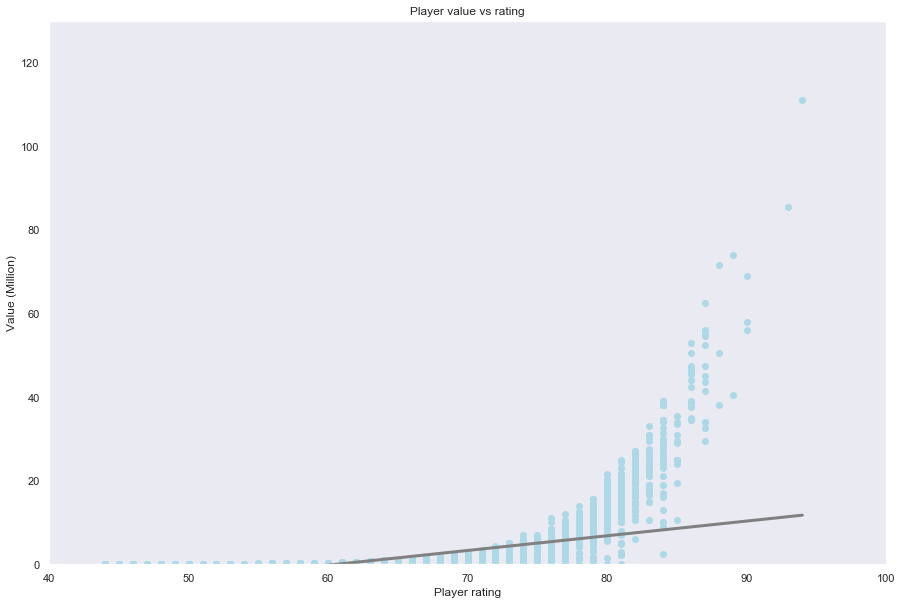

In [36]:
def plot_chart(X, y, y_pred, x_l, x_h, y_l, y_h, c):
    plt.figure(figsize = (15,10))
    plt.scatter(X, y, c =c)
    plt.plot(X, y_pred, c ='gray', linewidth=3)

    plt.title('Player value vs rating')
    plt.ylim(y_l,y_h)
    plt.xlim(x_l,x_h)
    plt.ylabel('Value (Million)')
    plt.xlabel('Player rating')
    
plot_chart(X, y, y_pred, 40, 100, 0, 130, 'lightblue')

A few observations:

    Linear regression is not a good fit to the data (let's try polynomial models)
    There are a lot of players with zero value that skewed the dataset (let's exclude those from our analysis)

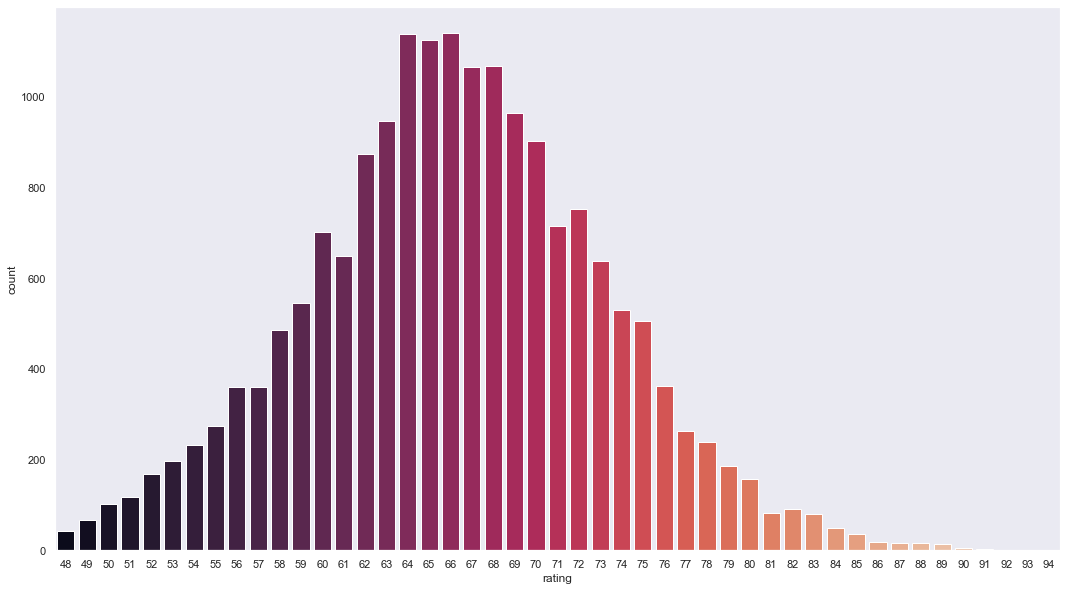

In [38]:
#The Overall Rating
plt.figure(figsize=(18,10))
sns.countplot(fifa_15['rating'], palette='rocket')
plt.show()

In [39]:
fifa_16.sort_values(by = 'free_kick' , ascending = False)[['name','club','nationality','rating', 'age','free_kick']].head(5)

,name,club,nationality,rating,age,free_kick
420,H. Çalhanoğlu,Bayer 04 Leverkusen,Turkey,79,21,95
67,A. Pirlo,New York City FC,Italy,84,36,93
465,Z. Junuzović,SV Werder Bremen,Austria,79,27,92
1164,J. Arango,Club Tijuana,Venezuela,76,35,91
176,M. Depay,Manchester United,Netherlands,81,21,90


In [40]:
#Age Distribution
clubs = ['Chelsea' , 'Arsenal', 'Liverpool', 'Manchester City', 'Manchester United', 
         'Juventus', 'Roma', 'Napoli', 'Inter', 'Milan', 
         'Paris Sain-Germain' ,
         'FC Bayern München', 'Borussia Dortmund', 
         'Real Madrid' , 'FC Barcelona' , 'Atlético Madrid']

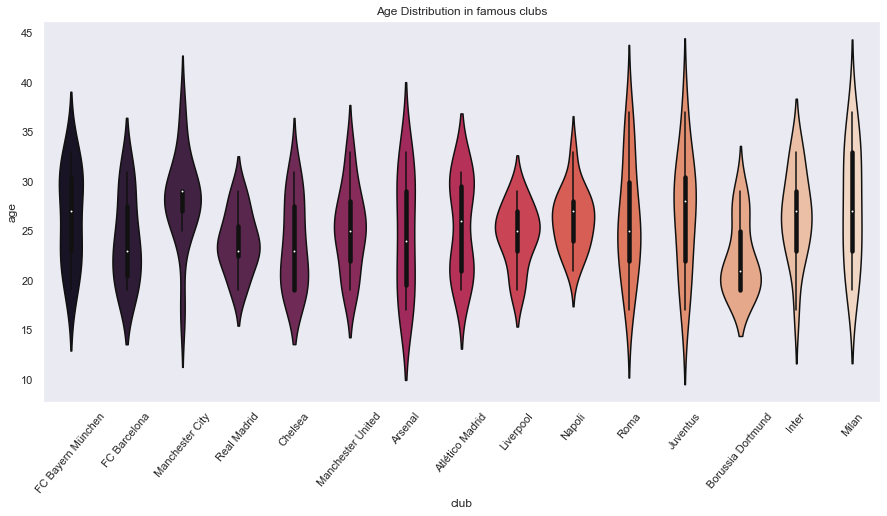

In [41]:
fifa_club_age = fifa_16.loc[fifa_16['club'].isin(clubs) & fifa_16['age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'club' , y = 'age' , data = fifa_club_age,palette='rocket')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

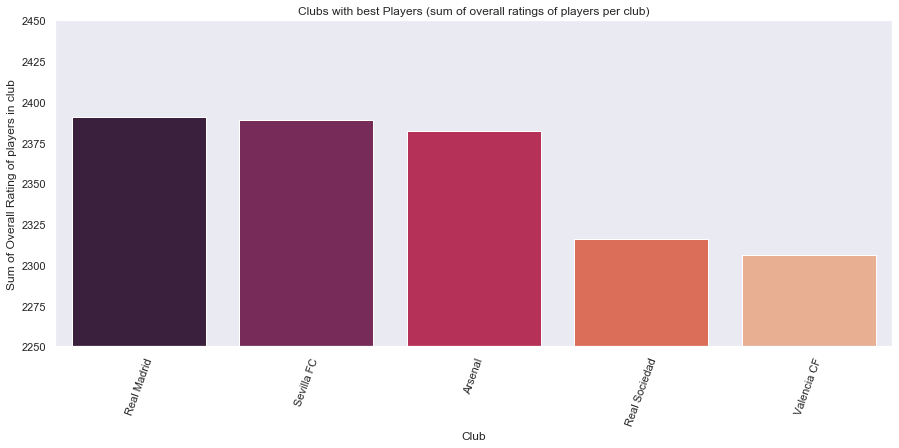

In [45]:
#The Best Club
best_dict = {}
for club in fifa_16['club'].unique():
    overall_rating = fifa_16['rating'][fifa_16['club'] == club].sum()
    best_dict[club] = overall_rating
best_club = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['rating'])
best_club['club'] = best_club.index
best_club = best_club.sort_values(by = 'rating' , ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x = 'club' , y  = 'rating' , data = best_club.head(5),palette='rocket')  
plt.xticks(rotation = 70)
plt.xlabel("Club")
plt.ylabel('Sum of Overall Rating of players in club')
plt.title('Clubs with best Players (sum of overall ratings of players per club)')
plt.ylim(2250 , 2450)
plt.show()



In [46]:
countries = ['England' , 'Brazil' , 'Portugal' ,'Argentina',
             'Italy' , 'Spain' , 'Germany' ,'Netherlands','France']

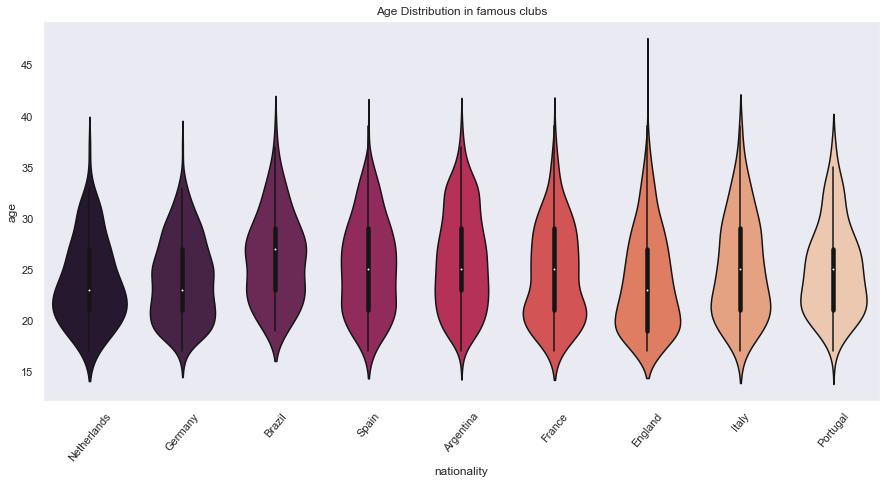

In [47]:
#Age Distribution
fifa_country_age = fifa_16.loc[fifa_16['nationality'].isin(countries) & fifa_16['age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'nationality' , y = 'age' , data = fifa_country_age, palette='rocket')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()


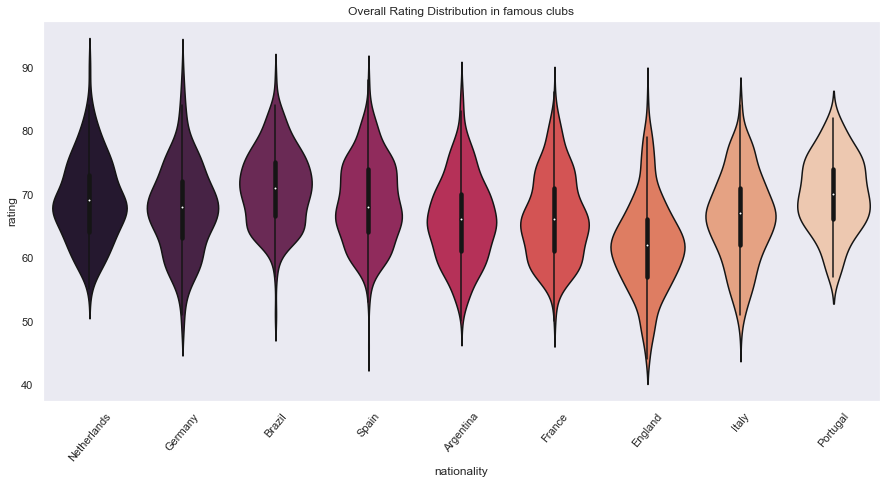

In [50]:
#Overall Rating
fifa_country_rating = fifa_16.loc[fifa_16['nationality'].isin(countries) & fifa_16['rating']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'nationality' , y = 'rating' , data = fifa_country_age, palette='rocket')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()


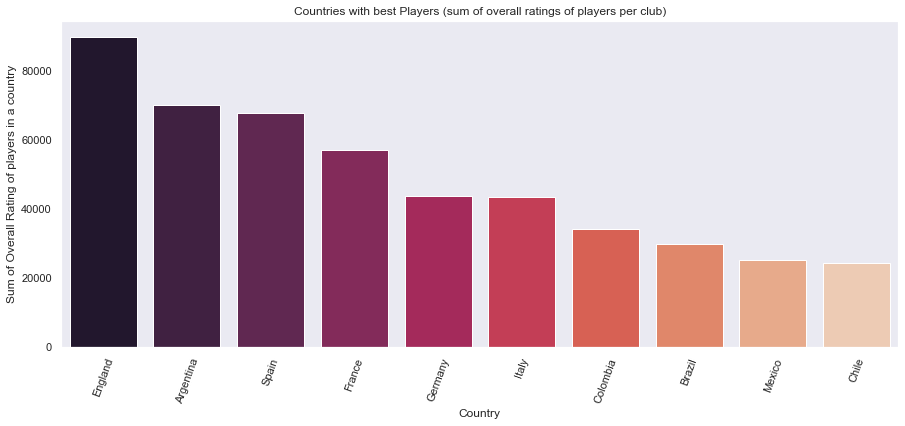

In [51]:
#The Best Country
best_dict = {}
for country in fifa_16['nationality'].unique():
    overall_rating = fifa_16['rating'][fifa_16['nationality'] == country].sum()
    best_dict[country] = overall_rating
best_country = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['rating'])
best_country['club'] = best_country.index
best_country = best_country.sort_values(by = 'rating' , ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x = 'club' , y  = 'rating' , data = best_country.head(10),palette='rocket')  
plt.xticks(rotation = 70)
plt.xlabel("Country")
plt.ylabel('Sum of Overall Rating of players in a country')
plt.title('Countries with best Players (sum of overall ratings of players per club)')
plt.show()


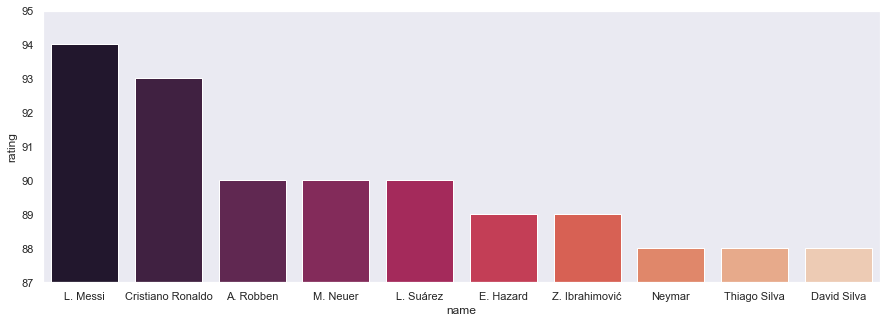

In [52]:
#The Top 10 Players
fifa_best_players = pd.DataFrame.copy(fifa_16.sort_values(by = 'rating' , ascending = False ).head(10))

plt.figure(1 , figsize = (15 , 5))
sns.barplot(x ='name' , y = 'rating' , data = fifa_best_players,palette='rocket')

plt.ylim(87 , 95)
plt.show()


In [53]:
fifa_16.sort_values(by = 'wage_K' , ascending = False)[['name','club','nationality','rating','age','wage_K']].head()

,name,club,nationality,rating,age,wage_K
0,L. Messi,FC Barcelona,Argentina,94,28,550.0
1,Cristiano Ronaldo,Real Madrid,Portugal,93,30,475.0
4,L. Suárez,FC Barcelona,Uruguay,90,28,300.0
2,A. Robben,FC Bayern München,Netherlands,90,31,250.0
3,M. Neuer,FC Bayern München,Germany,90,29,250.0


In [57]:
#Correlations among different variables
numcols = ['rating', 'pace', 'shooting', 'passing',  'dribbling',  'defending','physic', 'speed', 
           'acceleration', 'wage_K']
catcols = ['name','club','nationality','preferred_foot','position']
player_df = fifa_16[numcols+ catcols]

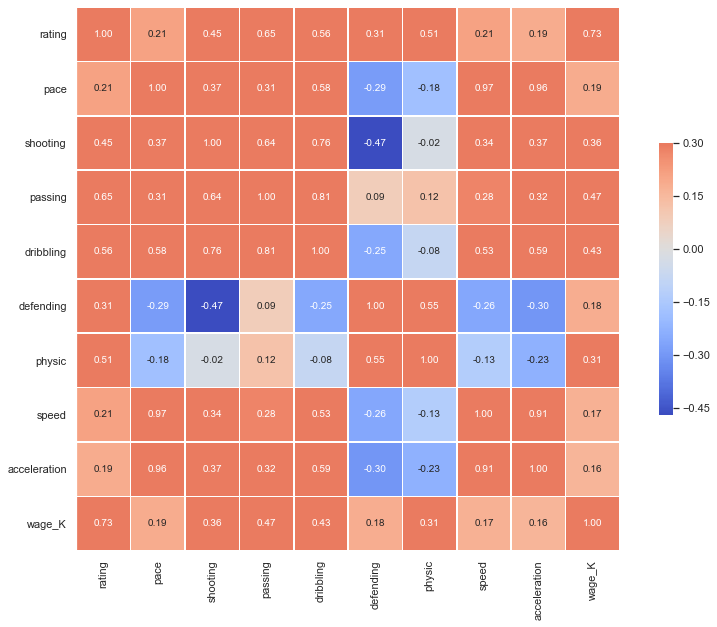

In [58]:
corr = player_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [59]:
#Choosing clubs and nationalities in order to perform the check
filtered_player_df = fifa_16[(fifa_16['club'].isin(['Chelsea' , 'Arsenal', 'Liverpool', 'Manchester City', 
                                                    'Manchester United', 
                                                    'Juventus', 'Roma', 'Napoli', 'Inter', 'Milan',
                                                    'Paris Sain-Germain' 
                                                    'FC Bayern München', 'Borussia Dortmund',
                                                    'Real Madrid' , 'FC Barcelona' , 'Atlético Madrid'])) &
                             (player_df['nationality'].isin(['England' , 'Brazil' , 'Portugal' ,'Argentina', 
                                                             'Italy' , 'Spain' , 'Germany' ,'Netherlands','France']))]

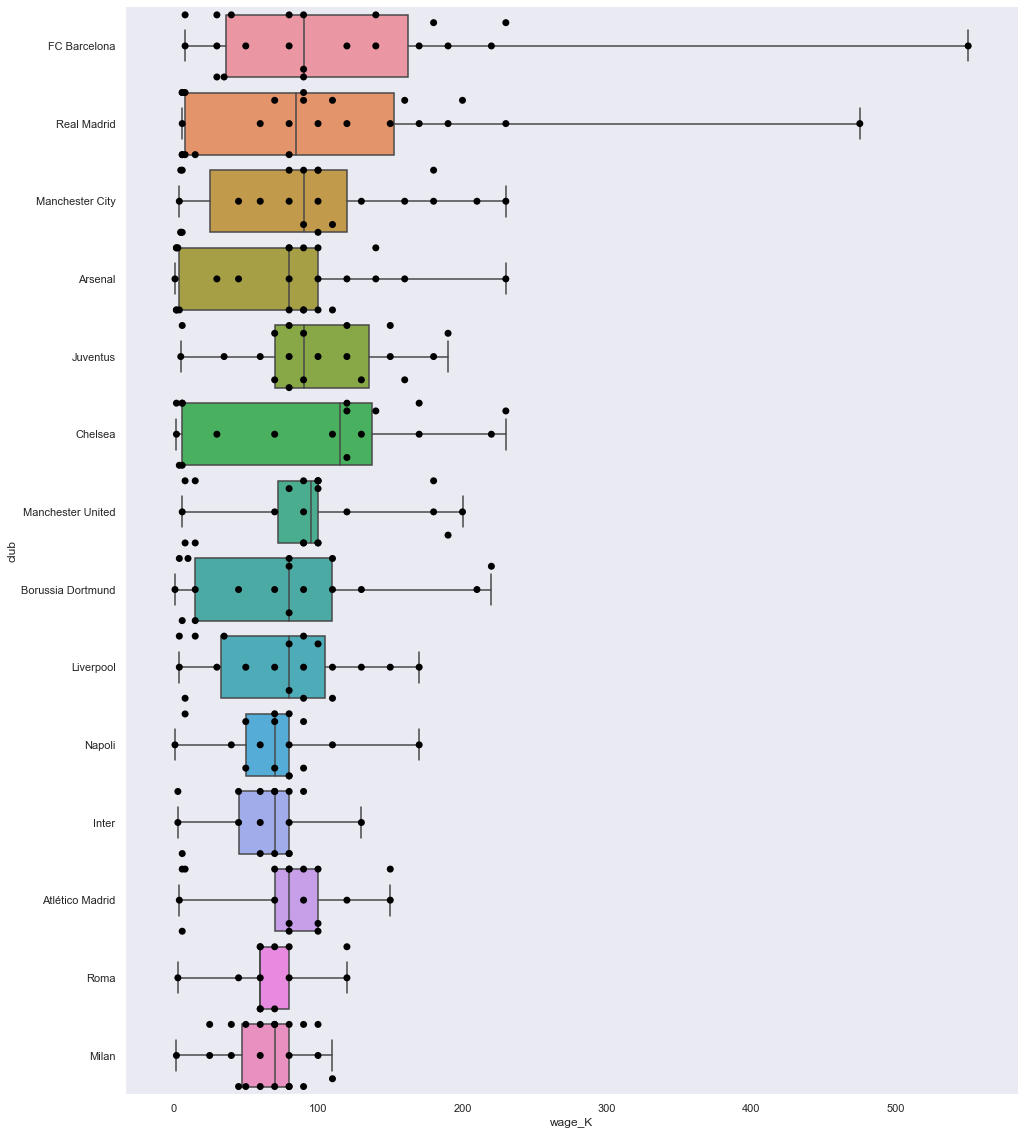

In [60]:
#nationalites in the important clubs
g = sns.boxplot(y = "club",
              x = 'wage_K', 
              data = filtered_player_df, whis=np.inf)
g = sns.swarmplot(y = "club",
              x = 'wage_K', 
              data = filtered_player_df,
              # Decrease the size of the points to avoid crowding 
              size = 7,color = 'black')
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(16,20)
plt.show()